In [77]:
%matplotlib inline

# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
import statistics
import scipy.stats as sts
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

import random 
import timeit
import requests
import time
import gmaps

#Notice the difference in import syntax for these modules. This eliminates the need to double type the name
#For example: datetime.datetime.xyz
from citipy import citipy
from datetime import datetime
from scipy.stats import linregress

# Import API keys.
from config import weather_api_key

from config import g_key
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)


In [39]:
#6.1.4 Generate Random Latitudes and Longitudes##########################################

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

#The zip helps with memory management. It creates an iterable object. After you iterate over it, the zip empties.
lat_lngs = zip(lats, lngs)
lat_lngs

#The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. 
#If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, 
#where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively

In [40]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

#Now that we have our ordered pairs of latitudes and longitudes in a list, 
#we can iterate through the list of tuples and find the nearest city to those coordinates.

In [41]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

644

In [42]:
# 6.2.6 Get the City Weather Data ##################################################################################


In [43]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [44]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
# ****check enumerate. Allows you to access the index of the "i".
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | victoria
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | matagami
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | perpignan
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | ust-maya
Processing Record 14 of Set 1 | aviles
Processing Record 15 of Set 1 | aswan
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | sulangan
Processing Record 19 of Set 1 | faanui
Processing Record 20 of Set 1 | lorengau
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | luanda
Processing Record 23 of Set 1 | chicama
Processin

Processing Record 42 of Set 4 | bafoulabe
Processing Record 43 of Set 4 | nuevo progreso
Processing Record 44 of Set 4 | kurchum
Processing Record 45 of Set 4 | clinton
Processing Record 46 of Set 4 | conceicao da barra
Processing Record 47 of Set 4 | mar del plata
Processing Record 48 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 49 of Set 4 | urumqi
Processing Record 50 of Set 4 | touros
Processing Record 1 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 2 of Set 5 | takoradi
Processing Record 3 of Set 5 | los llanos de aridane
Processing Record 4 of Set 5 | khatanga
Processing Record 5 of Set 5 | mount gambier
Processing Record 6 of Set 5 | bethel
Processing Record 7 of Set 5 | luganville
Processing Record 8 of Set 5 | broken hill
Processing Record 9 of Set 5 | cidreira
Processing Record 10 of Set 5 | am timan
Processing Record 11 of Set 5 | svetlogorsk
Processing Record 12 of Set 5 | upala
Processing Record 13 of Set 5 | tumannyy
City not found

Processing Record 33 of Set 8 | shelburne
Processing Record 34 of Set 8 | naryan-mar
Processing Record 35 of Set 8 | homer
Processing Record 36 of Set 8 | sobolevo
Processing Record 37 of Set 8 | catia la mar
Processing Record 38 of Set 8 | seoul
Processing Record 39 of Set 8 | ijaki
City not found. Skipping...
Processing Record 40 of Set 8 | gillette
Processing Record 41 of Set 8 | dakar
Processing Record 42 of Set 8 | nouadhibou
Processing Record 43 of Set 8 | mirabad
Processing Record 44 of Set 8 | yerbogachen
Processing Record 45 of Set 8 | makaha
Processing Record 46 of Set 8 | vila velha
Processing Record 47 of Set 8 | meulaboh
Processing Record 48 of Set 8 | bam
Processing Record 49 of Set 8 | broome
Processing Record 50 of Set 8 | la ronge
Processing Record 1 of Set 9 | xacmaz
Processing Record 2 of Set 9 | ola
Processing Record 3 of Set 9 | muyezerskiy
Processing Record 4 of Set 9 | carballo
Processing Record 5 of Set 9 | tual
Processing Record 6 of Set 9 | college
Processing 

Processing Record 24 of Set 12 | bossier city
Processing Record 25 of Set 12 | kutum
Processing Record 26 of Set 12 | puerto escondido
Processing Record 27 of Set 12 | batagay-alyta
Processing Record 28 of Set 12 | tiarei
Processing Record 29 of Set 12 | usinsk
Processing Record 30 of Set 12 | saint-augustin
Processing Record 31 of Set 12 | port-de-bouc
Processing Record 32 of Set 12 | bayir
Processing Record 33 of Set 12 | kuche
City not found. Skipping...
Processing Record 34 of Set 12 | ituni
City not found. Skipping...
Processing Record 35 of Set 12 | tarudant
City not found. Skipping...
Processing Record 36 of Set 12 | mindelo
Processing Record 37 of Set 12 | nagato
Processing Record 38 of Set 12 | thinadhoo
Processing Record 39 of Set 12 | halifax
Processing Record 40 of Set 12 | nongstoin
Processing Record 41 of Set 12 | evensk
Processing Record 42 of Set 12 | berlevag
Processing Record 43 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 44 of Set 12 | redmon

In [48]:
len(city_data)

599

In [49]:
#This is a list of dictionaries
type(city_data)

list

In [50]:
#6.2.7 Create a DataFrame of City Weather Data ########################################################################

In [51]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.48,-69.36,38.14,78,6,3.18,GL,2020-06-26 00:21:30
1,Busselton,-33.65,115.33,53.01,81,50,14.16,AU,2020-06-26 00:21:31
2,Victoria,22.29,114.16,87.01,70,100,13.00,HK,2020-06-26 00:18:00
3,Castro,-24.79,-50.01,61.00,95,89,9.82,BR,2020-06-26 00:21:35
4,Yellowknife,62.46,-114.35,62.60,59,75,11.41,CA,2020-06-26 00:21:36
5,Saint-Philippe,-21.36,55.77,71.60,78,39,26.40,RE,2020-06-26 00:21:47
6,Matagami,49.75,-77.63,55.40,93,90,8.05,CA,2020-06-26 00:22:15
7,Atuona,-9.80,-139.03,80.02,74,10,12.80,PF,2020-06-26 00:21:34
8,Arraial Do Cabo,-22.97,-42.03,68.00,88,100,5.82,BR,2020-06-26 00:21:33
9,Perpignan,42.75,2.75,71.01,94,40,2.24,FR,2020-06-26 00:22:15


In [52]:
#assign a variable to an array of the columns in the order we want them to appear:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [53]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2020-06-26 00:21:30,77.48,-69.36,38.14,78,6,3.18
1,Busselton,AU,2020-06-26 00:21:31,-33.65,115.33,53.01,81,50,14.16
2,Victoria,HK,2020-06-26 00:18:00,22.29,114.16,87.01,70,100,13.00
3,Castro,BR,2020-06-26 00:21:35,-24.79,-50.01,61.00,95,89,9.82
4,Yellowknife,CA,2020-06-26 00:21:36,62.46,-114.35,62.60,59,75,11.41
...,...,...,...,...,...,...,...,...,...
594,Kara-Tyube,RU,2020-06-26 00:22:47,44.63,45.44,70.02,31,53,12.59
595,Kaoma,ZM,2020-06-26 00:22:47,-14.78,24.80,54.05,80,9,6.85
596,Mastic Beach,US,2020-06-26 00:20:33,40.77,-72.85,75.99,69,75,9.17
597,Walvis Bay,NA,2020-06-26 00:22:47,-22.96,14.51,55.99,93,0,2.24


In [54]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

#The last line in the code block will export the DataFrame to a CSV file, with the INDEX label (or column A) header as “City_ID.” 
#If we ever need to export the CSV file to a DataFrame, that header will be present in the DataFrame.

In [55]:
# 6.3.1 Plot Latitude vs. Temperature - Visualizations for STEM students ###################################################

In [56]:
# Extract relevant fields from the DataFrame for plotting
#These are all series
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [57]:
type(lats)

pandas.core.series.Series

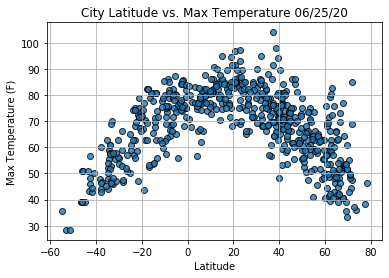

In [58]:
# Build the scatter plot for latitude vs. MAX TEMPERATURE.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

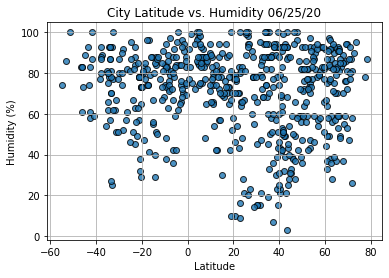

In [59]:
# Build the scatter plots for latitude vs. HUMIDITY.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

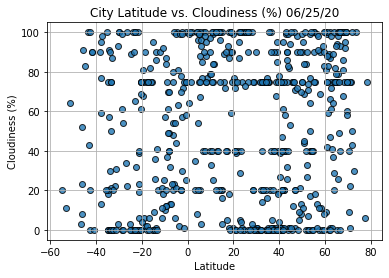

In [60]:
# Build the scatter plots for latitude vs. CLOUDINESS.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

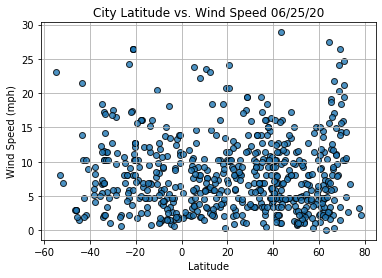

In [61]:
# Build the scatter plots for latitude vs. WIND SPEED.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [62]:
# 6.4.2 Find the Correlation Between Latitude and Maximum Temperature - uses Linear Regression FUNCTION ######################

In [63]:
# Create a FUNTCTION to create perform linear regression on the weather data **************************************
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [64]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

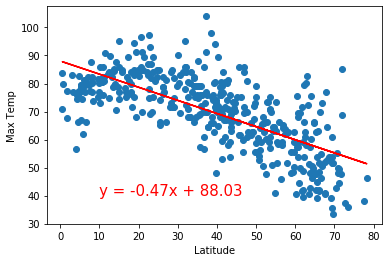

In [65]:
# Linear regression on the Northern Hemisphere - calls the function *****
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

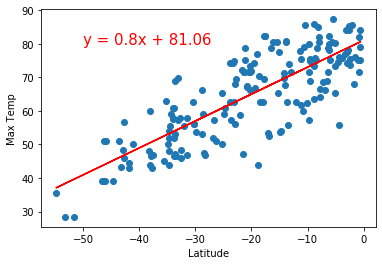

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,80))

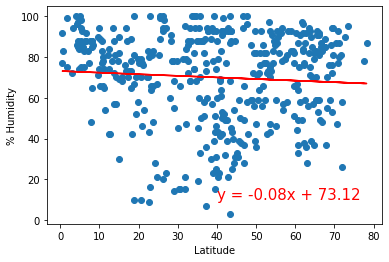

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

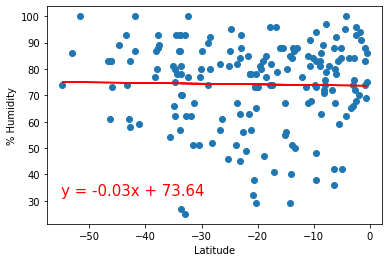

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,32))

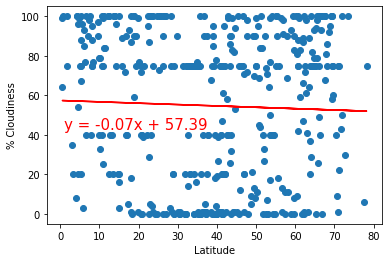

In [69]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(1,43))

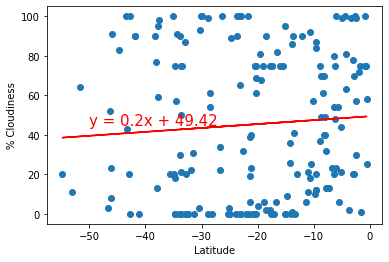

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,45))

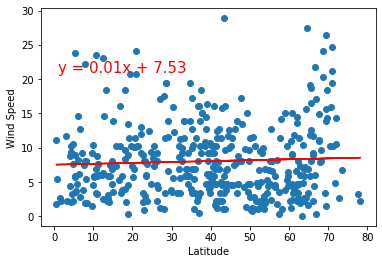

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(1,21))

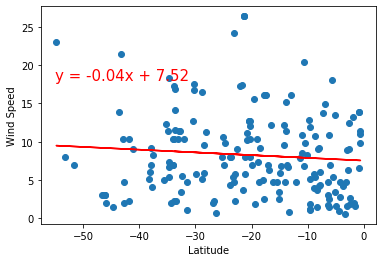

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-55,18))

In [73]:
# 6.5.2 Create Heatmaps for Weather Parameters #############################


In [74]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Qaanaaq,GL,2020-06-26 00:21:30,77.48,-69.36,38.14,78,6,3.18
1,1,Busselton,AU,2020-06-26 00:21:31,-33.65,115.33,53.01,81,50,14.16
2,2,Victoria,HK,2020-06-26 00:18:00,22.29,114.16,87.01,70,100,13.00
3,3,Castro,BR,2020-06-26 00:21:35,-24.79,-50.01,61.00,95,89,9.82
4,4,Yellowknife,CA,2020-06-26 00:21:36,62.46,-114.35,62.60,59,75,11.41


In [79]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))